# Music Recommendation
**By: ``Suraj Honkamble.``**
### Beginner Level Tast-3

### Problem Statement : 
- In this task, you will be asked to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set.

In [2]:
import pandas as pd
import numpy as np
#import py7zr #read 7z library

### Extracting all 7zr Zip files

In [ ]:
train_7zr=py7zr.SevenZipFile('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\train.csv.7z', mode='r')
train_7zr.extractall(path="D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\")
songs_7zr=py7zr.SevenZipFile('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\songs.csv.7z', mode='r')
songs_7zr.extractall(path="D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\")
songs_info_7zr=py7zr.SevenZipFile('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\song_extra_info.csv.7z', mode='r')
songs_info_7zr.extractall(path="D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\")
members_7zr=py7zr.SevenZipFile('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\members.csv.7z', mode='r')
members_7zr.extractall(path="D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\")

### Read all the required datasets

In [ ]:
train=pd.read_csv('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\train.csv',)
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
train.shape

(7377418, 6)

#### Rename msno to user_id

In [ ]:
train.rename({'msno':'user_id'}, axis=1, inplace=True)

### Read Songs dataset

In [ ]:
songs=pd.read_csv('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\songs.csv',)
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.shape

(2296320, 7)

### Read Extra song info dataset

In [ ]:
songs_info=pd.read_csv('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\song_extra_info.csv',)
songs_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
songs_info.shape

(2295971, 3)

### Read Members dataset

In [ ]:
user=pd.read_csv('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\members.csv',)
user.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
user.shape

(34403, 7)

### From the problem statement we already know that if the user listening to the songs within a month then it is marked as 1 so here we actually do not need any date related columns.

In [ ]:
user.drop(['registration_init_time','expiration_date'], axis=1, inplace=True)
user.rename({'msno':'user_id'}, axis=1, inplace=True)

### Merge the above all datasets

In [ ]:
#merge song ans song_info
df=pd.merge(songs, songs_info, how='inner', on='song_id')
df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,PLAYING WITH FIRE,NaN
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,SORRY| SORRY,NaN
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,愛我的資格,TWC950206108
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,Mary Had a Little Lamb,NaN


In [ ]:
df.shape

(2295422, 9)

In [ ]:
##merge df and train
df=pd.merge(df, train, how='inner', on='song_id')
df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,user_id,source_system_tab,source_screen_name,source_type,target
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,0
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010,VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=,my library,Local playlist more,local-library,1
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010,YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+8jBR0=,discover,Online playlist more,online-playlist,0
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,my library,Online playlist more,online-playlist,1
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,my library,Local playlist more,local-playlist,0


In [ ]:
df.shape

(7375849, 14)

In [ ]:
##merge df and user
df=pd.merge(df, user, how='inner', on='user_id')
df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,user_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,0,1,0,NaN,9
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,PLAYING WITH FIRE,NaN,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,0,1,0,NaN,9
2,XVdugYtHPN1vCK/8rsZZj/5MX8wv421d4unsaOpPq7I=,292571,465,傅又宣 (Maggie Fu),陶山,方文山,3.0,愛.這件事情,HKH621401004,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,0,1,0,NaN,9
3,gG3/58uZyyOwaPT+eGWL81mwCzcDPW2EmwYcjWmvJSs=,226742,465,五月天 (Mayday),阿信,阿信,3.0,私奔到月球,TWK230700701,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,1,1,0,NaN,9
4,QXxwXFuL2yNKyn2NM68uV7RJ2AaJukZeGPvu+y6kCJU=,238132,458,陳大天 (Daniel Chen),阿達/廖偉傑,陳大天,3.0,哪裡來的勇氣,TWB511692402,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,1,1,0,NaN,9


In [ ]:
df.shape

(7375849, 18)

In [ ]:
df['song_id'].nunique()

359755

### Target variable value count

1    3714050
0    3661799
Name: target, dtype: int64


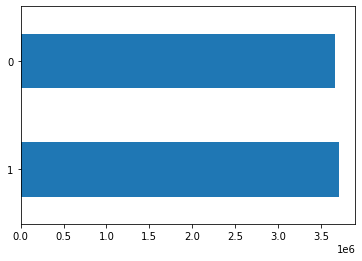

In [ ]:
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='barh');

### Duplicate rows

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375849 entries, 0 to 7375848
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   song_id             object 
 1   song_length         int64  
 2   genre_ids           object 
 3   artist_name         object 
 4   composer            object 
 5   lyricist            object 
 6   language            float64
 7   name                object 
 8   isrc                object 
 9   user_id             object 
 10  source_system_tab   object 
 11  source_screen_name  object 
 12  source_type         object 
 13  target              int64  
 14  city                int64  
 15  bd                  int64  
 16  gender              object 
 17  registered_via      int64  
dtypes: float64(1), int64(5), object(12)
memory usage: 1.0+ GB


### As we have song_id, lets remove song name

In [ ]:
df.drop('name', axis=1, inplace=True)

### Rename bd to Age

In [ ]:
df.rename({'bd':'age'}, axis=1, inplace=True)

<AxesSubplot:>

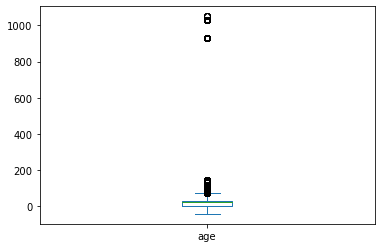

In [ ]:
df['age'].plot(kind='box')

#### Clearly we can see the extreme outliers in this column

<AxesSubplot:ylabel='Frequency'>

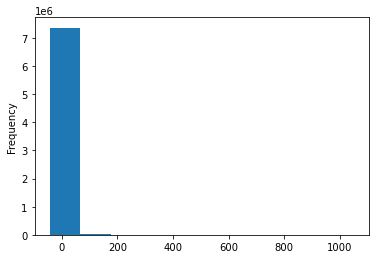

In [ ]:
df['age'].plot(kind='hist')

#### As we see most of the people entered their age as 0 while registering.. we cannot impute such values in large scale. Its better to drop this column.

In [ ]:
df.drop('age', axis=1, inplace=True)

#### City and Replying song again has no correlation.. Hence drop this column.

In [ ]:
df.drop('city', axis=1, inplace=True)

#### There are missing values in gender column, and there will be no relation between replying song and gender.

In [ ]:
df.drop('gender', axis=1, inplace=True)

### Missing values

In [ ]:
df.isna().sum()

song_id                     0
song_length                 0
genre_ids              118337
artist_name                 0
composer              1675125
lyricist              3177973
language                   36
isrc                   576394
user_id                     0
source_system_tab       24843
source_screen_name     414701
source_type             21535
target                      0
registered_via              0
dtype: int64

In [ ]:
data=df.copy()

#### We have lots of data to play with so drop missing rows.

In [ ]:
data.dropna(inplace=True)
data.shape

(3612963, 14)

In [ ]:
data['target'].value_counts()

1    1925797
0    1687166
Name: target, dtype: int64

#### After dropping the Nan rows, the  target class is still well balanced.

In [ ]:
data.dtypes

song_id                object
song_length             int64
genre_ids              object
artist_name            object
composer               object
lyricist               object
language              float64
isrc                   object
user_id                object
source_system_tab      object
source_screen_name     object
source_type            object
target                  int64
registered_via          int64
dtype: object

#### The data type of genre id must be int

In [ ]:
data=pd.read_csv('D:\\DATA SCIENCE Internship with LGMVIP\\data\\music-recommendation-challenge\\sample.csv')

### Seperate Numerical and Categorical features and perform transformation, and then merge these two datasets

In [ ]:
cat_col=[]
num_col=[]
for col in data.columns:
    if data[col].dtype=='object':
        cat_col.append(col)
    else:
        if col!='target':
            num_col.append(col)
        
print("Categorical columns", cat_col)
print("-------"*10)
print("Numerical columns", num_col)

Categorical columns ['song_id', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'isrc', 'user_id', 'source_system_tab', 'source_screen_name', 'source_type']
----------------------------------------------------------------------
Numerical columns ['song_length', 'language', 'registered_via']


#### Create dataframe which only contains categorical and numerical columns seperately

In [ ]:
cat_df=data[cat_col]
num_df=data[num_col]

### Use Label Encoding for Categorical columns and Standardization for Numerical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label=LabelEncoder()
cat_df_tf = cat_df.apply(LabelEncoder().fit_transform)
cat_df_tf.head()

,song_id,genre_ids,artist_name,composer,lyricist,isrc,user_id,source_system_tab,source_screen_name,source_type
0,17347,160,6919,27674,21611,41086,25257,3,8,3
1,42022,160,6424,29063,24027,13764,25257,3,8,3
2,52385,160,6338,28599,27683,47472,25257,3,8,3
3,33834,155,8381,28670,27863,40910,25257,3,8,3
4,70989,160,2368,19877,28955,37528,25257,3,8,3


In [ ]:
std=StandardScaler()
num_df_tf=std.fit_transform(num_df)
num_df_tf=pd.DataFrame(num_df_tf, columns=num_df.columns)
num_df_tf.head()

,song_length,language,registered_via
0,-0.044479,-0.492138,0.964324
1,0.982979,-0.492138,0.964324
2,-0.522363,-0.492138,0.964324
3,-0.261903,-0.492138,0.964324
4,-1.221262,1.229188,0.964324


In [ ]:
num_df_tf=pd.concat((num_df_tf, data['target']), axis=1)
num_df_tf.head()

,song_length,language,registered_via,target
0,-0.044479,-0.492138,0.964324,0
1,0.982979,-0.492138,0.964324,0
2,-0.522363,-0.492138,0.964324,1
3,-0.261903,-0.492138,0.964324,1
4,-1.221262,1.229188,0.964324,1


### COncatenate above tranformed columns to create final dataset for Model building

In [ ]:
data_final=pd.concat((cat_df_tf, num_df_tf), axis=1)
data_final.head()

,song_id,genre_ids,artist_name,composer,lyricist,isrc,user_id,source_system_tab,source_screen_name,source_type,song_length,language,registered_via,target
0,17347,160,6919,27674,21611,41086,25257,3,8,3,-0.044479,-0.492138,0.964324,0
1,42022,160,6424,29063,24027,13764,25257,3,8,3,0.982979,-0.492138,0.964324,0
2,52385,160,6338,28599,27683,47472,25257,3,8,3,-0.522363,-0.492138,0.964324,1
3,33834,155,8381,28670,27863,40910,25257,3,8,3,-0.261903,-0.492138,0.964324,1
4,70989,160,2368,19877,28955,37528,25257,3,8,3,-1.221262,1.229188,0.964324,1


In [4]:
#data_final.to_csv("movie_reccomendation_final.csv", index=False)
#data_final=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/movie_reccomendation_final.csv")

Clean data link: https://drive.google.com/file/d/1QF23G_DS0dzCGUUorVSdQVmPLjrTwXFH/view?usp=sharing

## Machine Learning Classification model to predict the target

### Seperate Input and Target variables

In [5]:
X=data_final.drop('target', axis=1)
y=data_final['target']

### SPlit data into train and test set

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

### 1. Logistic Regression

#### Training and prediction

In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#### Evaluation of model

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[  1473 335238]
 [  1252 384630]]
Out of total 722593 test cases, 336490 are missclassified)


**Nearly 50% are missclassified.**

In [10]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.54      0.00      0.01    336711
           1       0.53      1.00      0.70    385882

    accuracy                           0.53    722593
   macro avg       0.54      0.50      0.35    722593
weighted avg       0.54      0.53      0.38    722593



In [11]:
acc=(accuracy_score(y_test,y_pred)*100).round(2)
result=pd.DataFrame({"Algorithm":["Logistic Regression"], "Accuracy":[acc]})
result

,Algorithm,Accuracy
0,Logistic Regression,53.43


### Accuracy is very low.

### 2. Decision Tree CLassifier

#### Training and prediction

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

#### Evaluation of model

In [13]:
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[190735 145976]
 [143792 242090]]
Out of total 722593 test cases, 289768 are missclassified)


**About 40% values are Missclassified .**

In [14]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.57      0.57      0.57    336711
           1       0.62      0.63      0.63    385882

    accuracy                           0.60    722593
   macro avg       0.60      0.60      0.60    722593
weighted avg       0.60      0.60      0.60    722593



In [15]:
acc=(accuracy_score(y_test,y_pred)*100).round(2)
results=pd.DataFrame({"Algorithm":["Decision Tree"], "Accuracy":[acc]})
result=pd.concat((result,results))
result

,Algorithm,Accuracy
0,Logistic Regression,53.43
0,Decision Tree,59.90


**Prediction Accuracy is 60%, Which os better than the Logistic Regression.**

### 3. Naive Bayes classifier

#### Training and prediction

In [16]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive=naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)

#### EValuation of model

In [17]:
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[144759 191952]
 [102313 283569]]
Out of total 722593 test cases, 294265 are missclassified)


**40% values are missclassified.**

In [18]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.59      0.43      0.50    336711
           1       0.60      0.73      0.66    385882

    accuracy                           0.59    722593
   macro avg       0.59      0.58      0.58    722593
weighted avg       0.59      0.59      0.58    722593



In [19]:
acc=(accuracy_score(y_test,y_pred)*100).round(2)
results=pd.DataFrame({"Algorithm":["Naive Bayes"], "Accuracy":[acc]})
result=pd.concat((result,results))
result

,Algorithm,Accuracy
0,Logistic Regression,53.43
0,Decision Tree,59.90
0,Naive Bayes,59.28


**Accuracy is 59%.**

### 4. XGBoost classifier

#### Training and prediction

In [20]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)

#### Model evaluation

In [21]:
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[182531 154180]
 [ 94663 291219]]
Out of total 722593 test cases, 248843 are missclassified)


**Nearly 30% values are missclassified.**

In [22]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.66      0.54      0.59    336711
           1       0.65      0.75      0.70    385882

    accuracy                           0.66    722593
   macro avg       0.66      0.65      0.65    722593
weighted avg       0.66      0.66      0.65    722593



In [23]:
acc=(accuracy_score(y_test,y_pred)*100).round(2)
results=pd.DataFrame({"Algorithm":["XGBoost"], "Accuracy":[acc]})
result=pd.concat((result,results))
result

,Algorithm,Accuracy
0,Logistic Regression,53.43
0,Decision Tree,59.90
0,Naive Bayes,59.28
0,XGBoost,65.56


**Prediction Accuracy is 66% which is far better than all previous algorithm.**

### 5. Gradient Boosting Classifier

#### Training and prediction

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

#### Evaluation of model

In [25]:
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[189650 147061]
 [114466 271416]]
Out of total 722593 test cases, 261527 are missclassified)


**Nearly 35% are missclassified values.**

In [26]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.62      0.56      0.59    336711
           1       0.65      0.70      0.67    385882

    accuracy                           0.64    722593
   macro avg       0.64      0.63      0.63    722593
weighted avg       0.64      0.64      0.64    722593



In [27]:
acc=(accuracy_score(y_test,y_pred)*100).round(2)
results=pd.DataFrame({"Algorithm":["Gradient Boosting"], "Accuracy":[acc]})
result=pd.concat((result,results))
result

,Algorithm,Accuracy
0,Logistic Regression,53.43
0,Decision Tree,59.90
0,Naive Bayes,59.28
0,XGBoost,65.56
0,Gradient Boosting,63.81


**Accuracy is 64%.**

### 6. LGBM Classifier

#### Training and prediction

In [7]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm=lgbm.fit(x_train,y_train)
y_pred=lgbm.predict(x_test)

#### Model Evaluation

In [29]:
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[182357 154354]
 [100444 285438]]
Out of total 722593 test cases, 254798 are missclassified)


**Nearly 35% are missclassified values.**

In [30]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.64      0.54      0.59    336711
           1       0.65      0.74      0.69    385882

    accuracy                           0.65    722593
   macro avg       0.65      0.64      0.64    722593
weighted avg       0.65      0.65      0.64    722593



In [31]:
acc=(accuracy_score(y_test,y_pred)*100).round(2)
results=pd.DataFrame({"Algorithm":["LGBM"], "Accuracy":[acc]})
result=pd.concat((result,results))
result

,Algorithm,Accuracy
0,Logistic Regression,53.43
0,Decision Tree,59.90
0,Naive Bayes,59.28
0,XGBoost,65.56
0,Gradient Boosting,63.81
0,LGBM,64.74


**Accuracy is 65%.**

### 7. ADA Boost Classifier

#### Training and prediction

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [33]:
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[197402 139309]
 [129369 256513]]
Out of total 722593 test cases, 268678 are missclassified)


**Nearly 35% are missclassified.**

In [34]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.60      0.59      0.60    336711
           1       0.65      0.66      0.66    385882

    accuracy                           0.63    722593
   macro avg       0.63      0.63      0.63    722593
weighted avg       0.63      0.63      0.63    722593



In [35]:
acc=(accuracy_score(y_test,y_pred)*100).round(2)
results=pd.DataFrame({"Algorithm":["ADABoost"], "Accuracy":[acc]})
result=pd.concat((result,results))
result

,Algorithm,Accuracy
0,Logistic Regression,53.43
0,Decision Tree,59.90
0,Naive Bayes,59.28
0,XGBoost,65.56
0,Gradient Boosting,63.81
0,LGBM,64.74
0,ADABoost,62.82


**Accuracy is 63%.**

## Artificial Neural Network to Predict the Target

In [37]:
X=data_final.drop('target', axis=1)
y=data_final['target']

#### Train test split

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#### Standardize Input features so that ANN train faster

In [40]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std=std.fit(x_train)
x_train_tf=std.transform(x_train)
x_test_tf=std.transform(x_test)

In [45]:
x_train_tf.shape

(2890370, 13)

### Create ANN model

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [62]:
model=Sequential()
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform', input_dim=13))
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=120, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=240, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=520, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                448       
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dense_17 (Dense)            (None, 120)               7800      
                                                                 
 dense_18 (Dense)            (None, 240)               29040     
                                                                 
 dense_19 (Dense)            (None, 520)               125320    
                                                                 
 dense_20 (Dense)            (None, 1)                 521       
                                                                 
Total params: 165,241
Trainable params: 165,241
Non-tr

In [ ]:
#compile layer
from keras.optimizers import Adagrad
ada=Adagrad(lr=0.01)
model.compile(optimizer=ada, loss='binary_crossentropy', metrics=['accuracy'])
#train
model.fit(x_train_tf, y_train, epochs=50, batch_size=32)

Epoch 1/50
90325/90325 [==============================] - 330s 4ms/step - loss: 0.6680 - accuracy: 0.5965
Epoch 2/50
90325/90325 [==============================] - 326s 4ms/step - loss: 0.6543 - accuracy: 0.6270
Epoch 3/50
90325/90325 [==============================] - 328s 4ms/step - loss: 0.6511 - accuracy: 0.6297
Epoch 4/50
90325/90325 [==============================] - 328s 4ms/step - loss: 0.6498 - accuracy: 0.6311
Epoch 5/50
90325/90325 [==============================] - 328s 4ms/step - loss: 0.6489 - accuracy: 0.6325
Epoch 6/50
90325/90325 [==============================] - 328s 4ms/step - loss: 0.6482 - accuracy: 0.6337
Epoch 7/50
90325/90325 [==============================] - 328s 4ms/step - loss: 0.6477 - accuracy: 0.6345
Epoch 8/50
90325/90325 [==============================] - 329s 4ms/step - loss: 0.6472 - accuracy: 0.6352
Epoch 9/50
90325/90325 [==============================] - 328s 4ms/step - loss: 0.6468 - accuracy: 0.6357
Epoch 10/50
90325/90325 [=====================

In [ ]:
y_pred=model.predict(x_test_tf)
y_pred=np.where(y_pred>=0.5, 1, 0)

#### Evaluation of ANN model

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix::\n", confusion_matrix(y_test, y_pred))
print(f"Out of total {y_test.shape[0]} test cases, {sum(y_pred!=y_test)} are missclassified)")

Confusion Matrix::
 [[182357 154354]
 [100444 285438]]
Out of total 722593 test cases, 254798 are missclassified)


In [11]:
print("Claasification report::\n", classification_report(y_test,y_pred))

Claasification report::
               precision    recall  f1-score   support

           0       0.64      0.54      0.59    336711
           1       0.65      0.74      0.69    385882

    accuracy                           0.65    722593
   macro avg       0.65      0.64      0.64    722593
weighted avg       0.65      0.65      0.64    722593



**After Running deep learning model for 50 epochs accuracy recieved is 65%.. If you run model for lets say 100 or 200 epochs with different batch side.. Accuracy will be very high.**


**XGBoost classifier has higher accuracy than any other algorithm, but the Deep learning model when we train for 100 epochs accuracy will be higher.**